In [1]:
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv('spam.csv', encoding='latin-1')

## when we occur an encoding error while reading a CSV file, we can use the `chardet` library to detect the file's encoding. Here's how you can do it:
import chardet
import pandas as pd

# Open the file in binary mode to detect encoding
with open('your_file.csv', 'rb') as f:
    result = chardet.detect(f.read(100000)) # Reads the first 100,000 bytes

# The result is a dictionary; we want the 'encoding' key
file_encoding = result['encoding']
print(f"Detected encoding: {file_encoding}")

# Now, read the file using the detected encoding
df = pd.read_csv('your_file.csv', encoding=file_encoding)

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",NaN,NaN,NaN
5482,spam,URGENT We are trying to contact you Last weeke...,NaN,NaN,NaN
356,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN
2774,ham,"Dude u knw also telugu..thts gud..k, gud nyt..",NaN,NaN,NaN
5475,ham,Dhoni have luck to win some big title.so we wi...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Data Cleaning

In [7]:
# drop last 3 columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
# remaning the columns 
df.rename(columns={'v1': 'Target', 'v2': 'Message'}, inplace = True)

In [9]:
df.sample(5)

,Target,Message
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
1012,ham,I dunno they close oredi not... ÌÏ v ma fan...
58,ham,Tell where you reached
764,ham,"Wishing you and your family Merry \X\"" mas and..."
1527,ham,No screaming means shouting..


In [10]:
df = df[['Message', 'Target']]
df.head()

,Message,Target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [11]:
# binary encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])
df.head()

,Message,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
# missing values
df.isnull().sum()

Message    0
Target     0
dtype: int64

In [13]:
# duplicate values
df.duplicated().sum()

np.int64(403)

## EDA

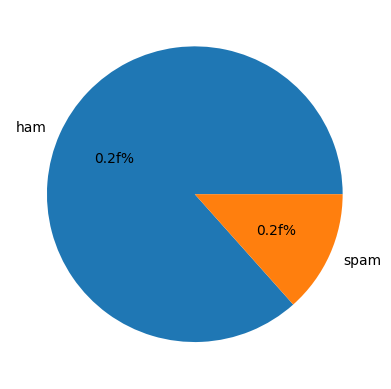

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='0.2f%%')
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nisith/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df['num_char']=df['Message'].apply(len)

In [18]:
# number of words
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df['num_sentence'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,Message,Target,num_char,num_words,num_sentence
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [21]:
# ham messages description
df[df['Target'] == 0][['Message', 'num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# spam messages description
df[df['Target'] == 1][['Message', 'num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [23]:
import seaborn as sns

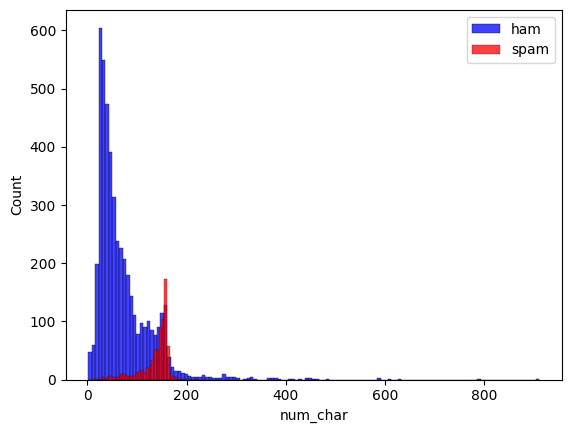

In [24]:
sns.histplot(df[df['Target']==0]['num_char'],color='blue', label='ham')
sns.histplot(df[df['Target']==1]['num_char'],color='red', label='spam')
plt.legend()

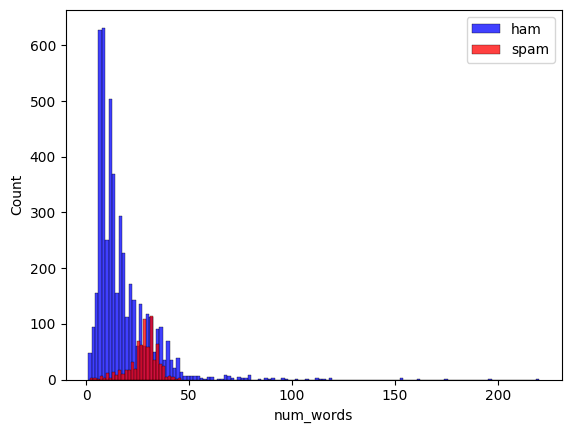

In [25]:
sns.histplot(df[df['Target']==0]['num_words'],color='blue', label='ham')
sns.histplot(df[df['Target']==1]['num_words'],color='red', label='spam')
plt.legend()

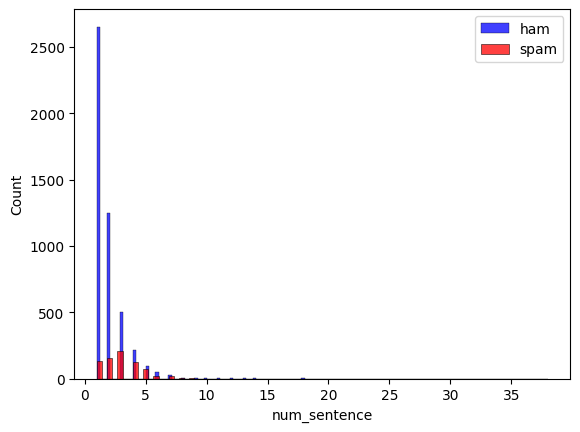

In [26]:
sns.histplot(df[df['Target']==0]['num_sentence'],color='blue', label='ham')
sns.histplot(df[df['Target']==1]['num_sentence'],color='red', label='spam')
plt.legend()

<Axes: >

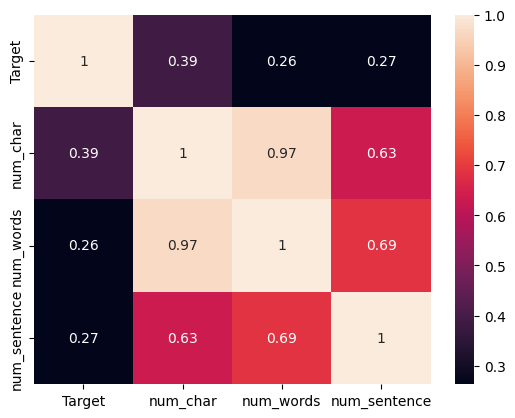

In [30]:
sns.heatmap(df[['Target', 'num_char', 'num_words', 'num_sentence']].corr(), annot=True)    

This shows that the corelation between num_char, num_words, num_sentence is high. Also num_char is highly correlated with Target. So we can drop the other columns.

In [40]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nisith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Preprocessing

In [42]:
def transform_message(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [46]:
df['transformed_message'] = df['Message'].apply(transform_message)

In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

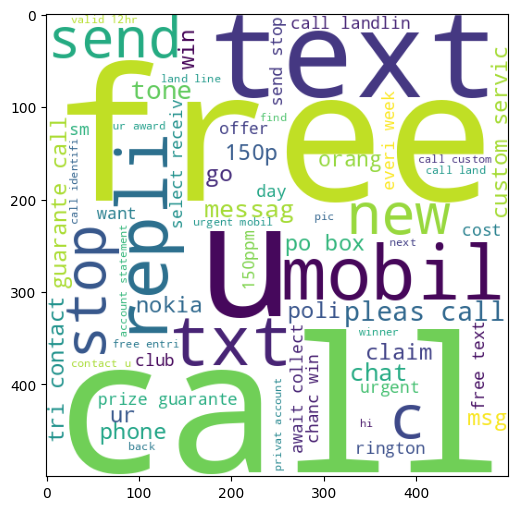

In [48]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_message'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

/var/folders/79/wyldv33s0152ftxz2vmhz03c0000gn/T/ipykernel_94161/2697697495.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_spam_words, palette='viridis')


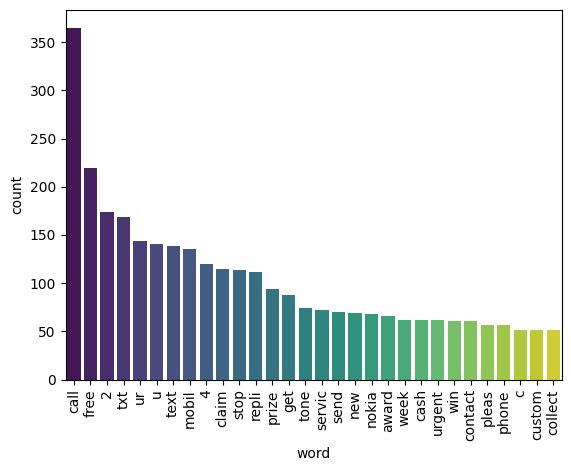

In [53]:
from collections import Counter


# Create a temporary DataFrame from the Counter object
df_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_spam_words, palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

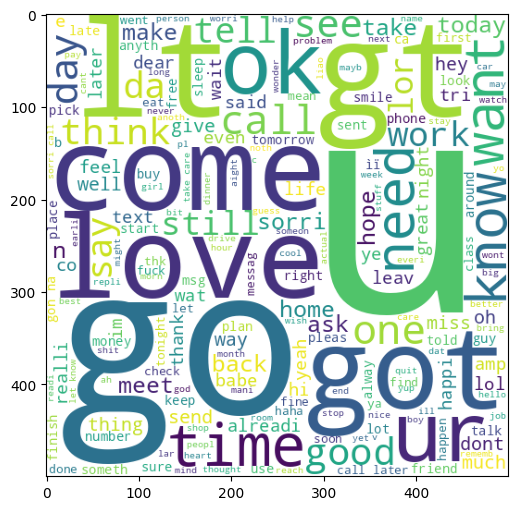

In [54]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_message'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [55]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


/var/folders/79/wyldv33s0152ftxz2vmhz03c0000gn/T/ipykernel_94161/1370424819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_ham_words, palette='viridis')


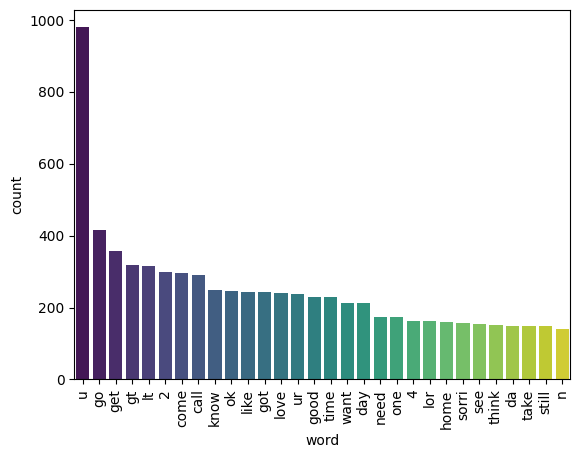

In [56]:
df_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_ham_words, palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = tfidf.fit_transform(df['transformed_message']).toarray()
y = df['Target'].values

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'GNB' : gnb,
    'MNB' : mnb,
    'BNB' : bnb,
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [65]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GNB
Accuracy -  0.8672645739910314
Precision -  0.5206611570247934
For  MNB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  BNB
Accuracy -  0.9748878923766816
Precision -  0.9850746268656716
For  SVC
Accuracy -  0.9713004484304932
Precision -  0.9846153846153847
For  KN
Accuracy -  0.9040358744394619
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9246636771300448
Precision -  0.8775510204081632
For  LR
Accuracy -  0.9515695067264573
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9659192825112107
Precision -  0.9838709677419355
For  AdaBoost
Accuracy -  0.9112107623318386
Precision -  0.8933333333333333
For  BgC
Accuracy -  0.95695067264574
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9713004484304932
Precision -  0.9921875
For  GBDT
Accuracy -  0.9363228699551569
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9596412556053812
Precision -  0.9747899159663865


## Improvements

In [66]:
# Apply voting classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [68]:
voting.fit(X_train,y_train)

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9775784753363229
Precision 1.0


In [ ]:
# Applying stacking using XGBClassifier
from sklearn.ensemble import StackingClassifier
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=XGBClassifier()

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [73]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9766816143497757
Precision 0.952054794520548


In [74]:
# Applying stacking using RandomForestClassifier
from sklearn.ensemble import StackingClassifier
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [76]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.979372197309417
Precision 0.9787234042553191
